In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#import bamboolib as bam
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_excel(r'/content/KickstarterData_Facts-1 (2)-1.xlsx')

df

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,2019-07-01,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,2019-07-01,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,2019-07-01,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,2019-07-01,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,2019-07-01,male,100,white,1,vanilla,yes,<50K,yes,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2019-07-09,male,100,black,4,chocolate,no,Not Reported,no,5,1
9996,9997,2019-07-09,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,9998,2019-07-09,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0
9998,9999,2019-07-09,male,0,blue,6,vanilla,no,Not Reported,no,6,0


In [127]:
df.isnull().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Donate ID                             10000 non-null  int64         
 1   Donate Date                           10000 non-null  datetime64[ns]
 2   Gender                                10000 non-null  object        
 3   Deposit Amount                        10000 non-null  int64         
 4   Preferred Color of Device             10000 non-null  object        
 5   Ice Cream Products Consumed Per Week  10000 non-null  int64         
 6   Favorite Flavor Of Ice Cream          10000 non-null  object        
 7   Donated To Kick Starter Before        10000 non-null  object        
 8   Household Income                      10000 non-null  object        
 9   Do you own a Keurig                   10000 non-null  object        
 10 

In [129]:
df = df.rename(columns={'Deposit Amount': 'Amount','Household Income':'Income', 'Preferred Color of Device': 'Color', 'Ice Cream Products Consumed Per Week': 'Weekly_IceCream', 'Favorite Flavor Of Ice Cream': 'Favorite', 'Donated To Kick Starter Before': 'Donated', 'Do you own a Keurig': 'Own_Keurig', 'How many desserts do you eat a week': 'Weekly_Desserts'})
df = df.drop(columns=['Donate ID'])
df = df.drop(columns=['Donate Date'])

In [130]:
categorical_cols = ['Gender', 'Color', 'Favorite', 'Donated','Income','Own_Keurig'] 

df_dum = pd.get_dummies(df, columns = categorical_cols, dtype=np.int64)

In [131]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Amount                  10000 non-null  int64
 1   Weekly_IceCream         10000 non-null  int64
 2   Weekly_Desserts         10000 non-null  int64
 3   Purchased               10000 non-null  int64
 4   Gender_female           10000 non-null  int64
 5   Gender_male             10000 non-null  int64
 6   Color_black             10000 non-null  int64
 7   Color_blue              10000 non-null  int64
 8   Color_no preference     10000 non-null  int64
 9   Color_red               10000 non-null  int64
 10  Color_silver            10000 non-null  int64
 11  Color_white             10000 non-null  int64
 12  Favorite_chocolate      10000 non-null  int64
 13  Favorite_no preference  10000 non-null  int64
 14  Favorite_specialty      10000 non-null  int64
 15  Favorite_swirl      

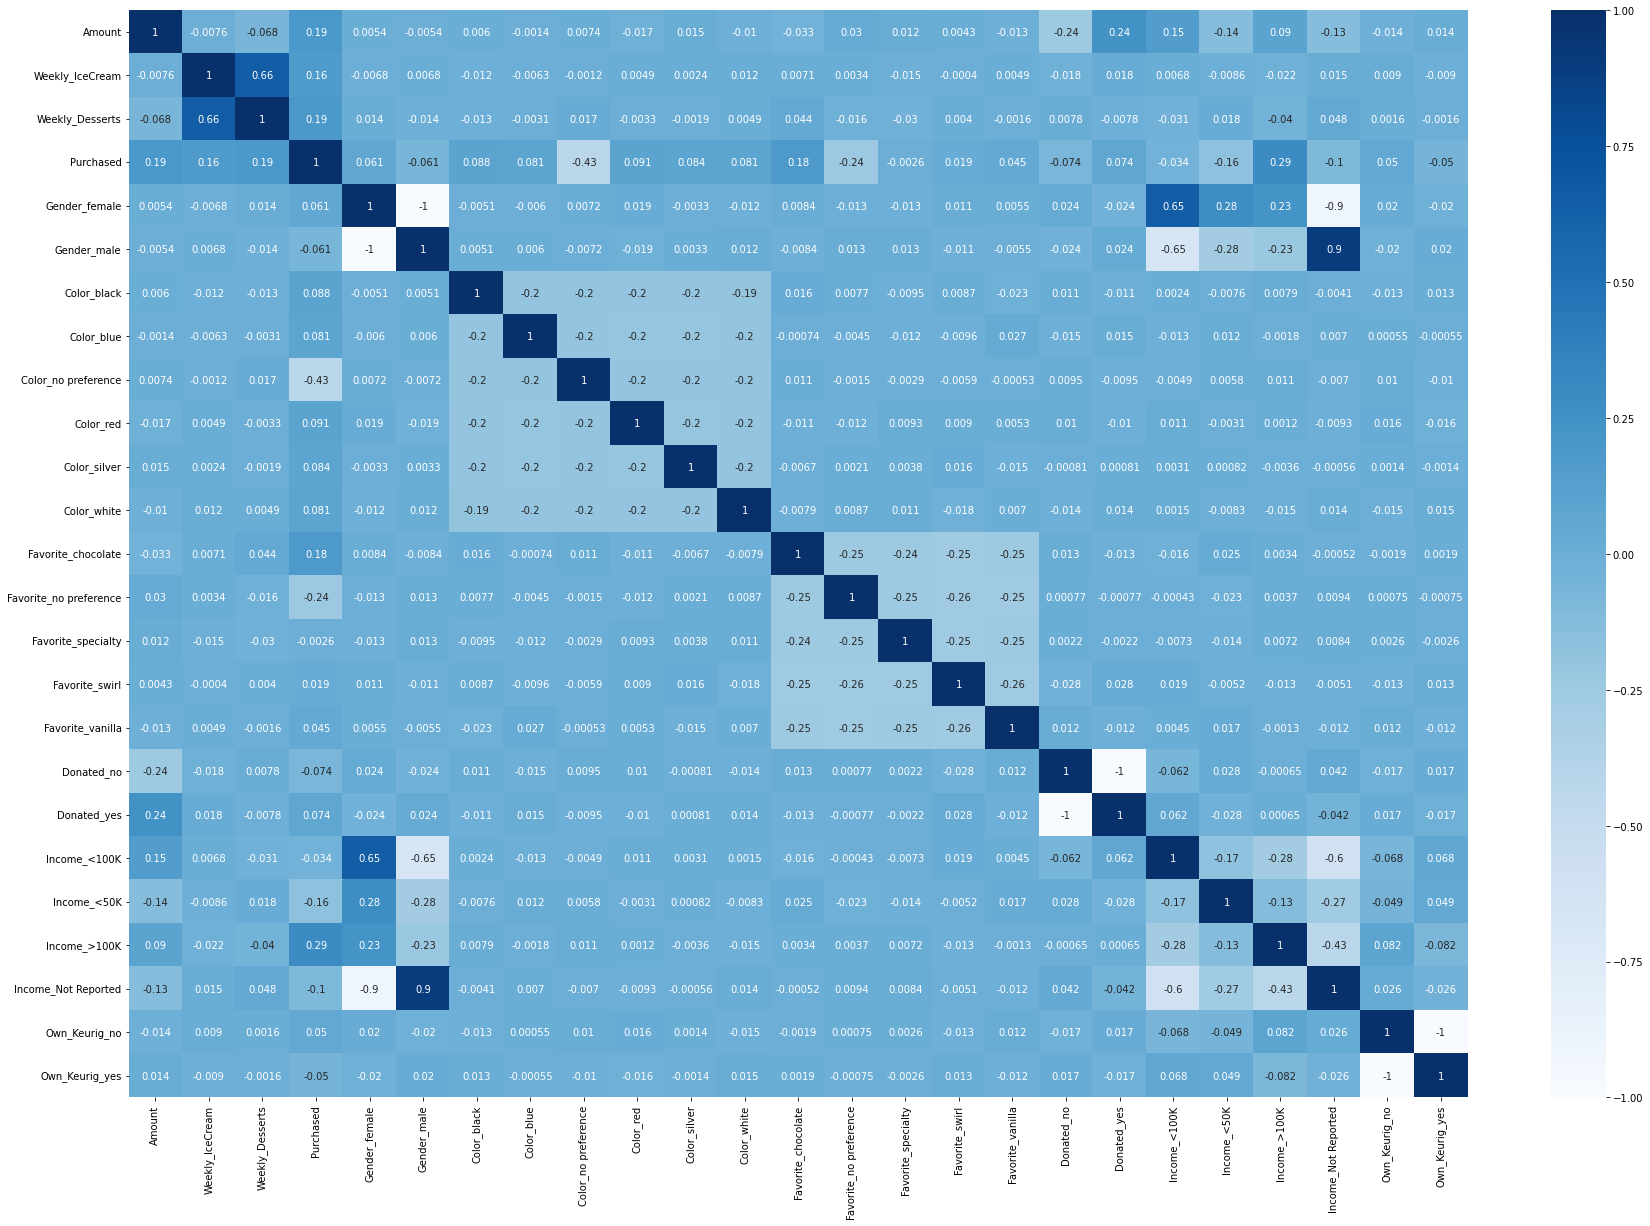

In [132]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(df_dum.corr(), annot = True, cmap='Blues', ax = ax)

In [133]:
# Step: Keep rows where Purchased == 1\
#dataframe where people purchased the product
df_y = df.loc[df['Purchased'] == 1]

#dataframe where people didn't purchased the product
df_n = df.loc[df['Purchased'] == 0]

df_n

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
0,female,100,white,4,vanilla,yes,<50K,yes,7,0
4,male,100,white,1,vanilla,yes,<50K,yes,7,0
5,male,100,white,0,vanilla,yes,<50K,yes,9,0
6,female,100,blue,2,vanilla,yes,<50K,yes,5,0
8,male,100,blue,2,vanilla,yes,<50K,yes,7,0
...,...,...,...,...,...,...,...,...,...,...
9990,male,100,silver,4,vanilla,no,Not Reported,yes,4,0
9996,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0
9998,male,0,blue,6,vanilla,no,Not Reported,no,6,0


In [134]:
df_y

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
1,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,female,100,silver,5,vanilla,yes,<50K,yes,5,1
7,female,100,black,5,vanilla,yes,<50K,yes,9,1
10,male,100,blue,10,vanilla,yes,<100K,yes,10,1
...,...,...,...,...,...,...,...,...,...,...
9991,male,100,silver,3,chocolate,no,Not Reported,no,5,1
9992,male,100,white,0,specialty,yes,Not Reported,yes,4,1
9993,male,100,black,8,vanilla,no,Not Reported,no,8,1
9994,male,100,red,4,chocolate,no,Not Reported,yes,6,1


In [135]:
import plotly.express as px
fig = px.histogram(df_y, x='Income', color='Gender')
fig

Text(0.5, 1.0, 'Purchase Decision Distribution of Weekly Consumption of Dessert')

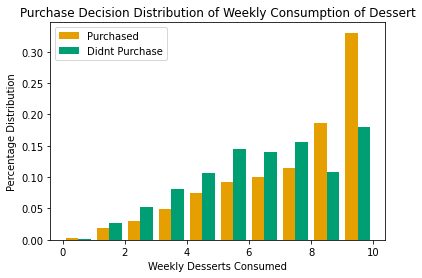

In [136]:
x1 = list(df_y['Weekly_Desserts'])
x2 = list(df_n['Weekly_Desserts'])
colors = ['#E69F00', '#009E73']
names = ['Purchased','Didnt Purchase']
plt.hist([x1, x2], color = colors, label=names, density=True)
plt.legend()
plt.xlabel('Weekly Desserts Consumed')
plt.ylabel('Percentage Distribution')
plt.title('Purchase Decision Distribution of Weekly Consumption of Dessert')

Text(0.5, 1.0, 'Genderwise Distribution(Purchased) of Weekly Consumption of Dessert')

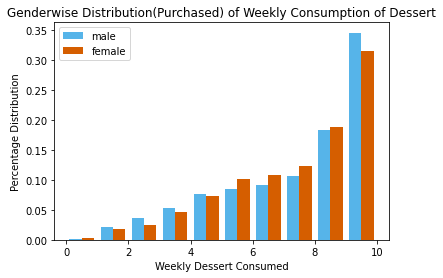

In [137]:
x1 = list(df_y[df_y['Gender'] == 'male']['Weekly_Desserts'])
x2 = list(df_y[df_y['Gender'] == 'female']['Weekly_Desserts'])
colors = ['#56B4E9', '#D55E00']
names = ['male','female']
plt.hist([x1, x2], color = colors, label=names, density=True)
plt.legend()
plt.xlabel('Weekly Dessert Consumed')
plt.ylabel('Percentage Distribution')
plt.title('Genderwise Distribution(Purchased) of Weekly Consumption of Dessert')

Text(0.5, 1.0, 'Genderwise Distribution of Weekly Consumption of IceCream')

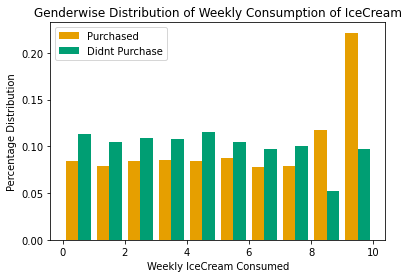

In [138]:
x1 = list(df_y['Weekly_IceCream'])
x2 = list(df_n['Weekly_IceCream'])
colors = ['#E69F00', '#009E73']
names = ['Purchased','Didnt Purchase']
plt.hist([x1, x2], color = colors, label=names, density=True)
plt.legend()
plt.xlabel('Weekly IceCream Consumed')
plt.ylabel('Percentage Distribution')
plt.title('Genderwise Distribution of Weekly Consumption of IceCream')

Text(0.5, 1.0, 'Genderwise Distribution(Purchased) of Weekly Consumption of IceCream')

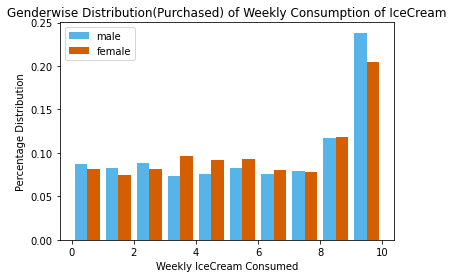

In [139]:
x1 = list(df_y[df_y['Gender'] == 'male']['Weekly_IceCream'])
x2 = list(df_y[df_y['Gender'] == 'female']['Weekly_IceCream'])
colors = ['#56B4E9', '#D55E00']
names = ['male','female']
plt.hist([x1, x2], color = colors, label=names, density=True)
plt.legend()
plt.xlabel('Weekly IceCream Consumed')
plt.ylabel('Percentage Distribution')
plt.title('Genderwise Distribution(Purchased) of Weekly Consumption of IceCream')

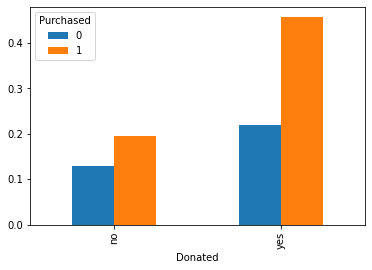

In [140]:
Crosstab1=pd.crosstab(index=df['Donated'],columns=df['Purchased'],normalize=True)
Crosstab1.plot.bar()

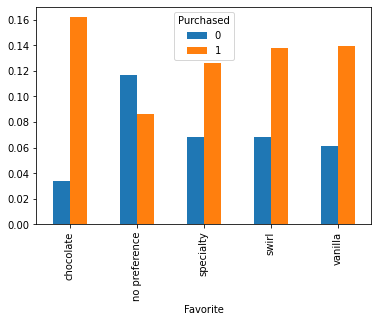

In [141]:
Crosstab2=pd.crosstab(index=df['Favorite'],columns=df['Purchased'],normalize=True)
Crosstab2.plot.bar()

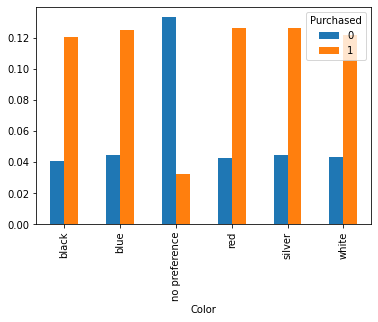

In [142]:
Crosstab3=pd.crosstab(index=df['Color'],columns=df['Purchased'],normalize=True)
Crosstab3.plot.bar()

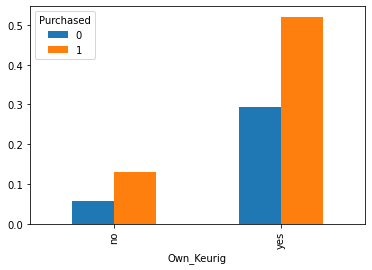

In [143]:
Crosstab4=pd.crosstab(index=df['Own_Keurig'],columns=df['Purchased'], normalize=True)
Crosstab4.plot.bar()

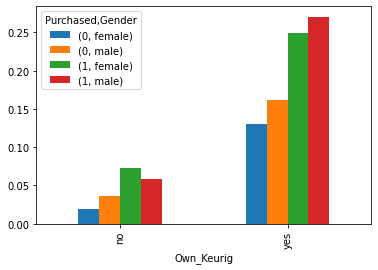

In [144]:
Crosstab9=pd.crosstab(df.Own_Keurig, [df.Purchased, df.Gender], normalize=True)
Crosstab9.plot.bar()

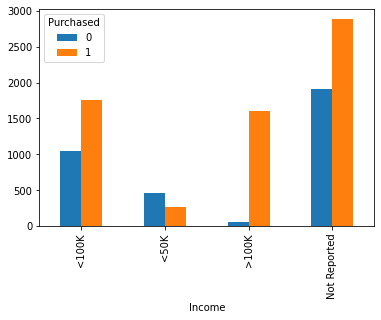

In [145]:
Crosstab5=pd.crosstab(index=df['Income'],columns=df['Purchased'])
Crosstab5.plot.bar()

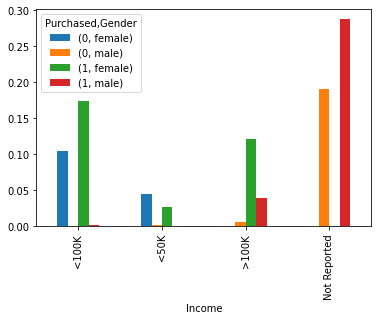

In [146]:
Crosstabr=pd.crosstab(df.Income, [df.Purchased, df.Gender], normalize=True)
Crosstabr.plot.bar()

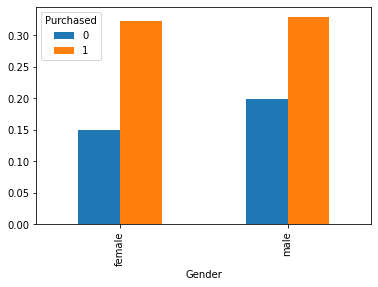

In [147]:
Crosstab6=pd.crosstab(index=df['Gender'],columns=df['Purchased'], normalize=True)
Crosstab6.plot.bar()

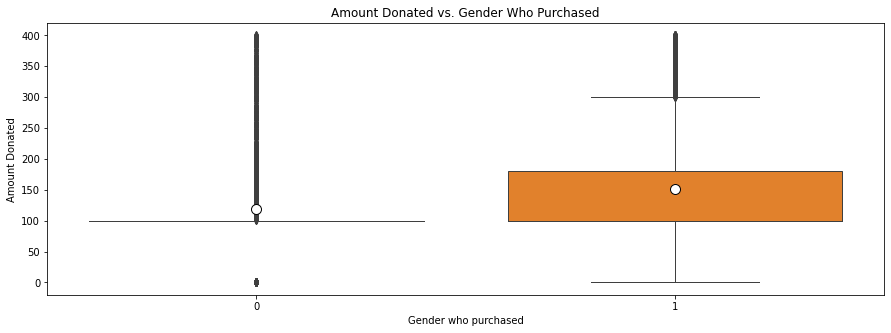

In [148]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = df['Purchased'],
            y = df['Amount'], 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
            linewidth = 1)
plt.title('Amount Donated vs. Gender Who Purchased')
plt.xlabel('Gender who purchased')
plt.ylabel('Amount Donated')
plt.xticks(fontsize = 10)
plt.show()

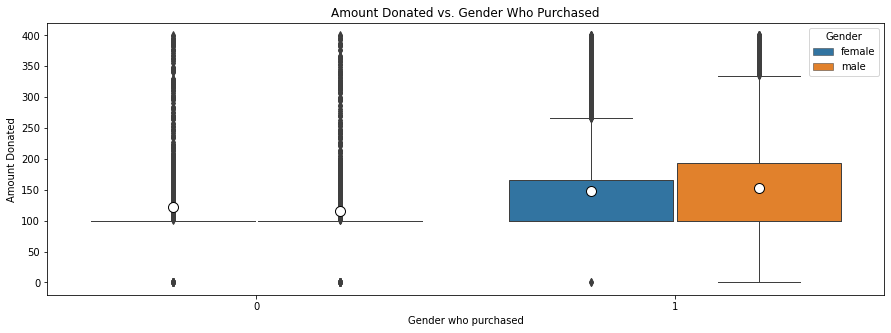

In [149]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = df['Purchased'],
            y = df['Amount'],
            hue = df['Gender'], 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
            linewidth = 1)
plt.title('Amount Donated vs. Gender Who Purchased')
plt.xlabel('Gender who purchased')
plt.ylabel('Amount Donated')
plt.xticks(fontsize = 10)
plt.show()

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           10000 non-null  object
 1   Amount           10000 non-null  int64 
 2   Color            10000 non-null  object
 3   Weekly_IceCream  10000 non-null  int64 
 4   Favorite         10000 non-null  object
 5   Donated          10000 non-null  object
 6   Income           10000 non-null  object
 7   Own_Keurig       10000 non-null  object
 8   Weekly_Desserts  10000 non-null  int64 
 9   Purchased        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [151]:
df_rich = df.loc[df['Income'] == '>100K']

df_rich

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
15,male,100,white,0,vanilla,yes,>100K,yes,3,1
689,female,100,red,7,vanilla,no,>100K,yes,9,1
690,female,100,blue,3,swirl,no,>100K,yes,9,1
692,female,100,silver,4,swirl,yes,>100K,yes,9,1
694,female,100,no preference,6,specialty,yes,>100K,yes,10,1
...,...,...,...,...,...,...,...,...,...,...
9978,female,100,red,0,swirl,no,>100K,yes,7,1
9983,female,0,silver,3,vanilla,yes,>100K,no,6,0
9985,female,100,blue,10,swirl,yes,>100K,no,10,1
9988,female,100,no preference,7,vanilla,no,>100K,yes,8,1


In [152]:
df_less = df.loc[df['Income'] == '<50K']

df_less

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
0,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,male,100,white,1,vanilla,yes,<50K,yes,7,0
...,...,...,...,...,...,...,...,...,...,...
6256,female,100,red,8,swirl,yes,<50K,yes,8,1
6262,female,100,red,8,specialty,yes,<50K,yes,8,1
6264,female,0,silver,8,specialty,yes,<50K,yes,8,1
6266,female,0,red,0,chocolate,yes,<50K,yes,4,0


In [153]:
df_rich

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
15,male,100,white,0,vanilla,yes,>100K,yes,3,1
689,female,100,red,7,vanilla,no,>100K,yes,9,1
690,female,100,blue,3,swirl,no,>100K,yes,9,1
692,female,100,silver,4,swirl,yes,>100K,yes,9,1
694,female,100,no preference,6,specialty,yes,>100K,yes,10,1
...,...,...,...,...,...,...,...,...,...,...
9978,female,100,red,0,swirl,no,>100K,yes,7,1
9983,female,0,silver,3,vanilla,yes,>100K,no,6,0
9985,female,100,blue,10,swirl,yes,>100K,no,10,1
9988,female,100,no preference,7,vanilla,no,>100K,yes,8,1


In [154]:
df_rich_keurig=df_rich.loc[df_rich['Own_Keurig'] == 'yes']
df_rich_keurig

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
15,male,100,white,0,vanilla,yes,>100K,yes,3,1
689,female,100,red,7,vanilla,no,>100K,yes,9,1
690,female,100,blue,3,swirl,no,>100K,yes,9,1
692,female,100,silver,4,swirl,yes,>100K,yes,9,1
694,female,100,no preference,6,specialty,yes,>100K,yes,10,1
...,...,...,...,...,...,...,...,...,...,...
9953,female,100,blue,3,no preference,yes,>100K,yes,6,1
9955,female,100,black,9,no preference,no,>100K,yes,9,1
9964,female,0,black,0,specialty,no,>100K,yes,6,0
9978,female,100,red,0,swirl,no,>100K,yes,7,1


In [155]:
df_rich_y = df_y.loc[df_y['Income'] == '>100K']

df_rich_y

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
15,male,100,white,0,vanilla,yes,>100K,yes,3,1
689,female,100,red,7,vanilla,no,>100K,yes,9,1
690,female,100,blue,3,swirl,no,>100K,yes,9,1
692,female,100,silver,4,swirl,yes,>100K,yes,9,1
694,female,100,no preference,6,specialty,yes,>100K,yes,10,1
...,...,...,...,...,...,...,...,...,...,...
9971,female,100,white,5,no preference,yes,>100K,no,7,1
9978,female,100,red,0,swirl,no,>100K,yes,7,1
9985,female,100,blue,10,swirl,yes,>100K,no,10,1
9988,female,100,no preference,7,vanilla,no,>100K,yes,8,1


In [156]:
df_m=df.loc[df['Gender'] == 'male']
df_male_not_report_all=df_m.loc[df_m['Income'] == 'Not Reported']

df_male_not_report_all

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
38,male,100,no preference,8,swirl,yes,Not Reported,yes,8,0
40,male,100,blue,10,vanilla,yes,Not Reported,yes,10,1
41,male,100,black,1,specialty,yes,Not Reported,yes,6,0
42,male,100,no preference,3,specialty,yes,Not Reported,yes,3,0
43,male,100,blue,9,vanilla,yes,Not Reported,yes,9,1
...,...,...,...,...,...,...,...,...,...,...
9995,male,100,black,4,chocolate,no,Not Reported,no,5,1
9996,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0
9998,male,0,blue,6,vanilla,no,Not Reported,no,6,0


In [157]:
df_male_not_report=df_m.loc[df_m['Income'] == 'Not Reported']
df_male_not_report

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
38,male,100,no preference,8,swirl,yes,Not Reported,yes,8,0
40,male,100,blue,10,vanilla,yes,Not Reported,yes,10,1
41,male,100,black,1,specialty,yes,Not Reported,yes,6,0
42,male,100,no preference,3,specialty,yes,Not Reported,yes,3,0
43,male,100,blue,9,vanilla,yes,Not Reported,yes,9,1
...,...,...,...,...,...,...,...,...,...,...
9995,male,100,black,4,chocolate,no,Not Reported,no,5,1
9996,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0
9998,male,0,blue,6,vanilla,no,Not Reported,no,6,0


In [158]:
df_choc=df.loc[df['Favorite'] == 'chocolate']

df_choc

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
30,male,100,red,6,chocolate,yes,<50K,yes,7,1
35,female,100,white,5,chocolate,yes,<100K,yes,5,1
45,female,100,red,1,chocolate,yes,Not Reported,yes,9,1
46,male,100,silver,1,chocolate,yes,Not Reported,yes,9,1
49,male,100,no preference,8,chocolate,yes,Not Reported,yes,8,0
...,...,...,...,...,...,...,...,...,...,...
9991,male,100,silver,3,chocolate,no,Not Reported,no,5,1
9994,male,100,red,4,chocolate,no,Not Reported,yes,6,1
9995,male,100,black,4,chocolate,no,Not Reported,no,5,1
9997,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0


In [159]:
df_choc_des=df_choc.loc[df_choc['Income'] == '>100K']

df_choc_des

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
695,female,100,white,3,chocolate,no,>100K,yes,7,1
713,female,100,blue,1,chocolate,no,>100K,yes,5,1
716,female,100,no preference,2,chocolate,yes,>100K,yes,10,1
721,female,100,silver,5,chocolate,yes,>100K,yes,10,1
722,female,100,no preference,2,chocolate,no,>100K,yes,9,1
...,...,...,...,...,...,...,...,...,...,...
9928,female,100,no preference,8,chocolate,yes,>100K,no,8,1
9930,female,100,black,5,chocolate,no,>100K,no,5,1
9931,female,100,black,6,chocolate,no,>100K,yes,6,1
9946,female,100,blue,10,chocolate,yes,>100K,no,10,1


In [160]:
df_week_dessert= df.loc[df['Weekly_Desserts']>8]
df_week_dessert

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
5,male,100,white,0,vanilla,yes,<50K,yes,9,0
7,female,100,black,5,vanilla,yes,<50K,yes,9,1
10,male,100,blue,10,vanilla,yes,<100K,yes,10,1
12,male,100,silver,9,vanilla,yes,<50K,yes,9,1
20,male,100,red,7,vanilla,yes,<50K,yes,10,1
...,...,...,...,...,...,...,...,...,...,...
9950,male,100,white,9,specialty,yes,Not Reported,yes,9,1
9955,female,100,black,9,no preference,no,>100K,yes,9,1
9979,male,100,red,9,vanilla,no,Not Reported,yes,9,1
9985,female,100,blue,10,swirl,yes,>100K,no,10,1


In [161]:
df_week_dessert_rich = df_week_dessert.loc[df_week_dessert['Income'] == '>100K']
df_week_dessert_rich

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
689,female,100,red,7,vanilla,no,>100K,yes,9,1
690,female,100,blue,3,swirl,no,>100K,yes,9,1
692,female,100,silver,4,swirl,yes,>100K,yes,9,1
694,female,100,no preference,6,specialty,yes,>100K,yes,10,1
697,female,100,no preference,4,vanilla,yes,>100K,yes,10,1
...,...,...,...,...,...,...,...,...,...,...
9941,female,100,red,9,swirl,yes,>100K,yes,9,1
9946,female,100,blue,10,chocolate,yes,>100K,no,10,1
9955,female,100,black,9,no preference,no,>100K,yes,9,1
9985,female,100,blue,10,swirl,yes,>100K,no,10,1


In [162]:
df_week_icecream= df.loc[df['Weekly_IceCream']>=8]
df_week_icecream_rich = df_week_icecream.loc[df_week_icecream['Income'] == '>100K']

df_week_icecream_rich


,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
704,female,100,white,10,vanilla,yes,>100K,yes,10,1
710,female,100,red,8,vanilla,yes,>100K,yes,8,1
717,female,100,red,8,no preference,yes,>100K,yes,8,1
724,female,100,no preference,8,vanilla,no,>100K,yes,8,1
731,female,100,white,9,no preference,yes,>100K,yes,9,1
...,...,...,...,...,...,...,...,...,...,...
9946,female,100,blue,10,chocolate,yes,>100K,no,10,1
9955,female,100,black,9,no preference,no,>100K,yes,9,1
9968,female,100,silver,8,no preference,yes,>100K,no,8,1
9985,female,100,blue,10,swirl,yes,>100K,no,10,1


In [163]:
df_donated=df.loc[df['Donated'] == 'yes']
df_donated

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
0,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,male,100,white,1,vanilla,yes,<50K,yes,7,0
...,...,...,...,...,...,...,...,...,...,...
9989,female,100,red,9,swirl,yes,>100K,no,9,1
9992,male,100,white,0,specialty,yes,Not Reported,yes,4,1
9996,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0


In [164]:
df_donated_rich=df_rich.loc[df_rich['Donated'] == 'yes']

df_donated_rich

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
15,male,100,white,0,vanilla,yes,>100K,yes,3,1
692,female,100,silver,4,swirl,yes,>100K,yes,9,1
694,female,100,no preference,6,specialty,yes,>100K,yes,10,1
697,female,100,no preference,4,vanilla,yes,>100K,yes,10,1
701,female,100,silver,5,swirl,yes,>100K,yes,5,1
...,...,...,...,...,...,...,...,...,...,...
9970,female,100,silver,6,no preference,yes,>100K,no,6,1
9971,female,100,white,5,no preference,yes,>100K,no,7,1
9983,female,0,silver,3,vanilla,yes,>100K,no,6,0
9985,female,100,blue,10,swirl,yes,>100K,no,10,1


In [165]:
df_donated_keurig=df_donated.loc[df_donated['Own_Keurig'] == 'yes']
df_donated_keurig

,Gender,Amount,Color,Weekly_IceCream,Favorite,Donated,Income,Own_Keurig,Weekly_Desserts,Purchased
0,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,male,100,white,1,vanilla,yes,<50K,yes,7,0
...,...,...,...,...,...,...,...,...,...,...
9987,male,100,black,1,vanilla,yes,Not Reported,yes,8,1
9992,male,100,white,0,specialty,yes,Not Reported,yes,4,1
9996,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0


In [166]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Amount                  10000 non-null  int64
 1   Weekly_IceCream         10000 non-null  int64
 2   Weekly_Desserts         10000 non-null  int64
 3   Purchased               10000 non-null  int64
 4   Gender_female           10000 non-null  int64
 5   Gender_male             10000 non-null  int64
 6   Color_black             10000 non-null  int64
 7   Color_blue              10000 non-null  int64
 8   Color_no preference     10000 non-null  int64
 9   Color_red               10000 non-null  int64
 10  Color_silver            10000 non-null  int64
 11  Color_white             10000 non-null  int64
 12  Favorite_chocolate      10000 non-null  int64
 13  Favorite_no preference  10000 non-null  int64
 14  Favorite_specialty      10000 non-null  int64
 15  Favorite_swirl      

In [167]:
df_dum["Weekly_Desserts>8"] = np.where(df_dum['Weekly_Desserts']>8, 1, 0)


In [168]:
df_dum

,Amount,Weekly_IceCream,Weekly_Desserts,Purchased,Gender_female,Gender_male,Color_black,Color_blue,Color_no preference,Color_red,...,Favorite_vanilla,Donated_no,Donated_yes,Income_<100K,Income_<50K,Income_>100K,Income_Not Reported,Own_Keurig_no,Own_Keurig_yes,Weekly_Desserts>8
0,100,4,7,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
1,100,5,5,1,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
2,100,6,6,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,100,5,5,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,100,1,7,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100,4,5,1,0,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
9996,100,6,6,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
9997,0,3,5,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
9998,0,6,6,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,1,0,0


In [169]:
df_dum.corr()['Purchased'].sort_values()

Color_no preference      -0.425983
Favorite_no preference   -0.240725
Income_<50K              -0.164882
Income_Not Reported      -0.101176
Donated_no               -0.074324
Gender_male              -0.060926
Own_Keurig_yes           -0.049560
Income_<100K             -0.033883
Favorite_specialty       -0.002559
Favorite_swirl            0.018532
Favorite_vanilla          0.044798
Own_Keurig_no             0.049560
Gender_female             0.060926
Donated_yes               0.074324
Color_blue                0.080977
Color_white               0.081253
Color_silver              0.083611
Color_black               0.087763
Color_red                 0.090880
Weekly_Desserts>8         0.160542
Weekly_IceCream           0.164915
Favorite_chocolate        0.182308
Weekly_Desserts           0.189489
Amount                    0.194643
Income_>100K              0.291545
Purchased                 1.000000
Name: Purchased, dtype: float64

In [170]:
df_dum['Purchased'].value_counts()

1    6513
0    3487
Name: Purchased, dtype: int64

In [171]:
df_dum['Weekly_Desserts>8'].value_counts()

0    7222
1    2778
Name: Weekly_Desserts>8, dtype: int64

In [172]:
df_dum

,Amount,Weekly_IceCream,Weekly_Desserts,Purchased,Gender_female,Gender_male,Color_black,Color_blue,Color_no preference,Color_red,...,Favorite_vanilla,Donated_no,Donated_yes,Income_<100K,Income_<50K,Income_>100K,Income_Not Reported,Own_Keurig_no,Own_Keurig_yes,Weekly_Desserts>8
0,100,4,7,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
1,100,5,5,1,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
2,100,6,6,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,100,5,5,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,100,1,7,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100,4,5,1,0,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
9996,100,6,6,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
9997,0,3,5,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
9998,0,6,6,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,1,0,0


In [173]:
#categorical_cols = ['Gender', 'Color', 'Favorite', 'Donated','Income','Own_Keurig'] 

#df_dum = pd.get_dummies(df, columns = categorical_cols, dtype=np.int64)

In [174]:
df_dum = df_dum.drop(columns=['Gender_male'])

In [175]:
df_dum = df_dum.drop(columns=['Color_white'])

In [176]:
df_dum = df_dum.drop(columns=['Favorite_vanilla'])

In [177]:
df_dum = df_dum.drop(columns=['Donated_no'])

In [178]:
df_dum = df_dum.drop(columns=['Income_Not Reported'])

In [179]:
df_dum = df_dum.drop(columns=['Own_Keurig_no'])

In [180]:
df_dum

,Amount,Weekly_IceCream,Weekly_Desserts,Purchased,Gender_female,Color_black,Color_blue,Color_no preference,Color_red,Color_silver,Favorite_chocolate,Favorite_no preference,Favorite_specialty,Favorite_swirl,Donated_yes,Income_<100K,Income_<50K,Income_>100K,Own_Keurig_yes,Weekly_Desserts>8
0,100,4,7,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,100,5,5,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
2,100,6,6,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,100,5,5,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,100,1,7,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100,4,5,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9996,100,6,6,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
9997,0,3,5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
9998,0,6,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
x=df_dum.drop(['Purchased'],axis=1)
y=df_dum[['Purchased']]

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 ,random_state = 1)
x_train.shape, x_test.shape

((8000, 19), (2000, 19))

In [183]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train[['Amount', 'Weekly_IceCream', 'Weekly_Desserts']])
x_train[['Amount', 'Weekly_IceCream', 'Weekly_Desserts']] = sc.transform(x_train[['Amount', 'Weekly_IceCream', 'Weekly_Desserts']])
x_train.head()

,Amount,Weekly_IceCream,Weekly_Desserts,Gender_female,Color_black,Color_blue,Color_no preference,Color_red,Color_silver,Favorite_chocolate,Favorite_no preference,Favorite_specialty,Favorite_swirl,Donated_yes,Income_<100K,Income_<50K,Income_>100K,Own_Keurig_yes,Weekly_Desserts>8
2694,-0.490388,-0.305679,0.940923,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1
5140,-0.490388,1.588293,1.346275,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2568,-0.490388,-0.305679,-0.680485,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0
3671,-0.490388,-0.937003,1.346275,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
7427,-0.365138,1.272631,0.940923,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


In [184]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
print(logm1.fit().summary2())

                   Results: Generalized linear model
Model:                 GLM                AIC:              5318.8163  
Link Function:         logit              BIC:              -66439.0143
Dependent Variable:    Purchased          Log-Likelihood:   -2639.4    
Date:                  2022-11-20 22:54   LL-Null:          -5169.0    
No. Observations:      8000               Deviance:         5278.8     
Df Model:              19                 Pearson chi2:     3.78e+04   
Df Residuals:          7980               Scale:            1.0000     
Method:                IRLS                                            
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   1.5529   0.1467  10.5861 0.0000  1.2654  1.8404
Amount                  1.1252   0.0555  20.2886 0.0000  1.0165  1.2339
Weekly_IceC

In [185]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [186]:
col = x_train.columns[rfe.support_]
col

Index(['Amount', 'Weekly_IceCream', 'Weekly_Desserts', 'Gender_female',
       'Color_no preference', 'Favorite_chocolate', 'Favorite_no preference',
       'Favorite_specialty', 'Favorite_swirl', 'Donated_yes', 'Income_<100K',
       'Income_<50K', 'Income_>100K', 'Own_Keurig_yes', 'Weekly_Desserts>8'],
      dtype='object')

In [187]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary2())


                   Results: Generalized linear model
Model:                 GLM                AIC:              5313.9687  
Link Function:         logit              BIC:              -66471.8108
Dependent Variable:    Purchased          Log-Likelihood:   -2641.0    
Date:                  2022-11-20 22:54   LL-Null:          -5169.0    
No. Observations:      8000               Deviance:         5282.0     
Df Model:              15                 Pearson chi2:     3.82e+04   
Df Residuals:          7984               Scale:            1.0000     
Method:                IRLS                                            
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   1.5097   0.1259  11.9932 0.0000  1.2630  1.7565
Amount                  1.1242   0.0554  20.2800 0.0000  1.0156  1.2329
Weekly_IceC

In [188]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]


2694    0.903256
5140    0.956469
2568    0.908579
3671    0.813573
7427    0.706558
3993    0.623451
8082    0.942510
5130    0.043820
1717    0.930020
6921    0.442445
dtype: float64

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Gender_female,14.14
10,Income_<100K,10.59
12,Income_>100K,4.21
13,Own_Keurig_yes,3.80
11,Income_<50K,3.14
14,Weekly_Desserts>8,2.78
2,Weekly_Desserts,2.74
9,Donated_yes,2.74
1,Weekly_IceCream,1.80
8,Favorite_swirl,1.68


In [190]:
col = col.drop('Income_<100K',1)
col

Index(['Amount', 'Weekly_IceCream', 'Weekly_Desserts', 'Gender_female',
       'Color_no preference', 'Favorite_chocolate', 'Favorite_no preference',
       'Favorite_specialty', 'Favorite_swirl', 'Donated_yes', 'Income_<50K',
       'Income_>100K', 'Own_Keurig_yes', 'Weekly_Desserts>8'],
      dtype='object')

In [191]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Own_Keurig_yes,3.68
13,Weekly_Desserts>8,2.77
9,Donated_yes,2.71
2,Weekly_Desserts,2.65
3,Gender_female,2.09
1,Weekly_IceCream,1.79
8,Favorite_swirl,1.68
6,Favorite_no preference,1.63
7,Favorite_specialty,1.63
5,Favorite_chocolate,1.62


In [192]:
X_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary2())

                   Results: Generalized linear model
Model:                 GLM                AIC:              5446.1722  
Link Function:         logit              BIC:              -66346.5944
Dependent Variable:    Purchased          Log-Likelihood:   -2708.1    
Date:                  2022-11-20 22:54   LL-Null:          -5169.0    
No. Observations:      8000               Deviance:         5416.2     
Df Model:              14                 Pearson chi2:     2.18e+04   
Df Residuals:          7985               Scale:            1.0000     
Method:                IRLS                                            
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   1.5043   0.1242  12.1147 0.0000  1.2609  1.7476
Amount                  0.9953   0.0515  19.3327 0.0000  0.8944  1.0962
Weekly_IceC

In [193]:
col = col.drop('Gender_female',1)
col

Index(['Amount', 'Weekly_IceCream', 'Weekly_Desserts', 'Color_no preference',
       'Favorite_chocolate', 'Favorite_no preference', 'Favorite_specialty',
       'Favorite_swirl', 'Donated_yes', 'Income_<50K', 'Income_>100K',
       'Own_Keurig_yes', 'Weekly_Desserts>8'],
      dtype='object')

In [194]:
X_train_sm = sm.add_constant(x_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary2())

                   Results: Generalized linear model
Model:                 GLM                AIC:              5447.2182  
Link Function:         logit              BIC:              -66352.5356
Dependent Variable:    Purchased          Log-Likelihood:   -2709.6    
Date:                  2022-11-20 22:54   LL-Null:          -5169.0    
No. Observations:      8000               Deviance:         5419.2     
Df Model:              13                 Pearson chi2:     2.30e+04   
Df Residuals:          7986               Scale:            1.0000     
Method:                IRLS                                            
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   1.5395   0.1225  12.5624 0.0000  1.2993  1.7797
Amount                  1.0048   0.0513  19.5976 0.0000  0.9043  1.1053
Weekly_IceC

In [195]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sm.values,y_train.values)

LogisticRegression(random_state=0)

Feature: 0, Score: 0.00016
Feature: 1, Score: 0.97315
Feature: 2, Score: 0.29693
Feature: 3, Score: 0.36591
Feature: 4, Score: -5.00516
Feature: 5, Score: 1.53928
Feature: 6, Score: -2.17287
Feature: 7, Score: -0.39588
Feature: 8, Score: -0.28566
Feature: 9, Score: 0.23639
Feature: 10, Score: -1.30141
Feature: 11, Score: 5.06531
Feature: 12, Score: -0.27633
Feature: 13, Score: 0.92632


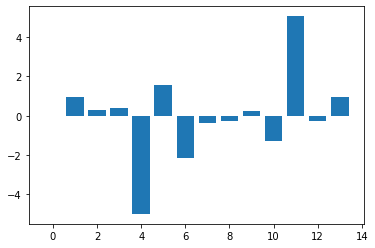

In [196]:
from matplotlib import pyplot
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [197]:
importances = pd.DataFrame(data={
    'Attribute': X_train_sm.columns,
    'Importance': classifier.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)


In [198]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2694    0.902473
5140    0.950480
2568    0.905530
3671    0.837305
7427    0.707638
3993    0.639776
8082    0.926206
5130    0.049184
1717    0.930362
6921    0.873338
dtype: float64

In [199]:
y_train_pred = y_train_pred.values.reshape(-1)

In [200]:
y_train_res = y_train.values.reshape(-1)

In [201]:
#y_train_pred.values

In [202]:
y_train_pred_final = pd.DataFrame({'Bought':y_train_res, 'Buying_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Bought,Buying_Prob,ID
0,1,0.902473,2694
1,1,0.950480,5140
2,1,0.905530,2568
3,1,0.837305,3671
4,1,0.707638,7427


In [203]:
y_train_pred_final['predicted'] = y_train_pred_final.Buying_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Bought,Buying_Prob,ID,predicted
0,1,0.902473,2694,1
1,1,0.950480,5140,1
2,1,0.905530,2568,1
3,1,0.837305,3671,1
4,1,0.707638,7427,1


In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
print("Accuracy (Training Set): ",round(metrics.accuracy_score(y_train_pred_final.Bought, y_train_pred_final.predicted),4))

Accuracy (Training Set):  0.8436


In [205]:
confusion = metrics.confusion_matrix(y_train_pred_final.Bought, y_train_pred_final.predicted )
confusion

array([[1963,  820],
       [ 431, 4786]])

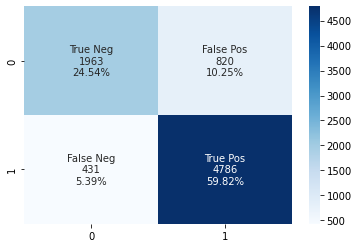

In [206]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Bought, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2783
           1       0.85      0.92      0.88      5217

    accuracy                           0.84      8000
   macro avg       0.84      0.81      0.82      8000
weighted avg       0.84      0.84      0.84      8000



In [208]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Buying_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Bought,Buying_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.902473,2694,1,1,1,1,1,1,1,1,1,1,1
1,1,0.950480,5140,1,1,1,1,1,1,1,1,1,1,1
2,1,0.905530,2568,1,1,1,1,1,1,1,1,1,1,1
3,1,0.837305,3671,1,1,1,1,1,1,1,1,1,1,0
4,1,0.707638,7427,1,1,1,1,1,1,1,1,1,0,0


In [209]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Bought, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.652125     1.000000     0.000000
0.1          0.1  0.769375     0.988882     0.357887
0.2          0.2  0.802750     0.978723     0.472871
0.3          0.3  0.836375     0.975465     0.575638
0.4          0.4  0.842375     0.953422     0.634208
0.5          0.5  0.843625     0.917385     0.705354
0.6          0.6  0.850125     0.871190     0.810636
0.7          0.7  0.832875     0.795860     0.902264
0.8          0.8  0.790875     0.702319     0.956881
0.9          0.9  0.715250     0.572168     0.983471


In [210]:
cutoff_df2 = pd.DataFrame( columns = ['Probability','Accuracy','Precision','Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Bought, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    reca = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df2.loc[i] =[ i ,accuracy,prec,reca]
print(cutoff_df2)

     Probability  Accuracy  Precision    Recall
0.0          0.0  0.652125   0.652125  1.000000
0.1          0.1  0.769375   0.742730  0.988882
0.2          0.2  0.802750   0.776814  0.978723
0.3          0.3  0.836375   0.811643  0.975465
0.4          0.4  0.842375   0.830107  0.953422
0.5          0.5  0.843625   0.853728  0.917385
0.6          0.6  0.850125   0.896096  0.871190
0.7          0.7  0.832875   0.938517  0.795860
0.8          0.8  0.790875   0.968288  0.702319
0.9          0.9  0.715250   0.984823  0.572168


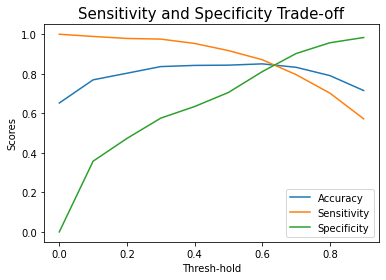

In [211]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.xlabel("Thresh-hold")
plt.ylabel("Scores")
plt.title("Sensitivity and Specificity Trade-off",size=15)
plt.show()

In [212]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Buying_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Bought,Buying_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.902473,2694,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.950480,5140,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.905530,2568,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.837305,3671,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.707638,7427,1,1,1,1,1,1,1,1,1,0,0,1


In [213]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Bought, y_train_pred_final.final_predicted )
confusion2

array([[2256,  527],
       [ 672, 4545]])

In [214]:
print("Accuracy (Training Set): ",round(metrics.accuracy_score(y_train_pred_final.Bought, y_train_pred_final.final_predicted),4))

Accuracy (Training Set):  0.8501


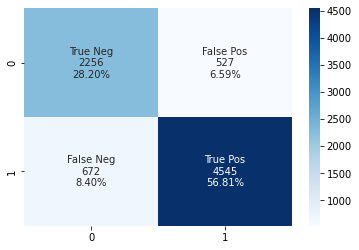

In [215]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion2, annot=labels, fmt='', cmap='Blues')

In [216]:
print(classification_report(y_train_pred_final.Bought, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2783
           1       0.90      0.87      0.88      5217

    accuracy                           0.85      8000
   macro avg       0.83      0.84      0.84      8000
weighted avg       0.85      0.85      0.85      8000



In [217]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Bought, y_train_pred_final.Buying_Prob)

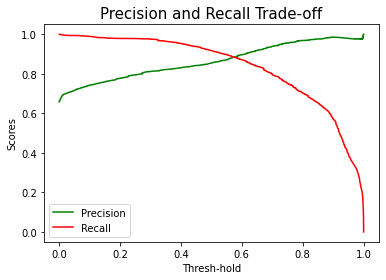

In [218]:
plt.plot(thresholds, p[:-1], "g-",label="Precision")
plt.plot(thresholds, r[:-1], "r-",label="Recall")
plt.xlabel("Thresh-hold")
plt.ylabel("Scores")
plt.title("Precision and Recall Trade-off",size=15)
plt.legend()
plt.show()

In [219]:
x_test[['Amount', 'Weekly_IceCream', 'Weekly_Desserts']] = sc.transform(x_test[['Amount', 'Weekly_IceCream', 'Weekly_Desserts']])

In [220]:
x_test = x_test[col]
x_test.head()

,Amount,Weekly_IceCream,Weekly_Desserts,Color_no preference,Favorite_chocolate,Favorite_no preference,Favorite_specialty,Favorite_swirl,Donated_yes,Income_<50K,Income_>100K,Own_Keurig_yes,Weekly_Desserts>8
9953,-0.490388,-0.621341,-0.275133,0,0,1,0,0,1,0,1,1,0
3850,-0.490388,-0.305679,-1.085837,0,0,1,0,0,1,0,0,1,0
4962,-0.490388,-1.568327,0.535571,1,0,0,0,0,0,0,0,1,0
3886,-0.490388,-1.252665,-0.275133,1,0,0,0,1,1,0,0,1,0
5437,-0.490388,0.641307,1.346275,0,0,0,0,1,0,0,0,1,1


In [221]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = res.predict(x_test_sm)

In [222]:
y_test_pred[:10]

9953    0.980460
3850    0.152105
4962    0.008363
3886    0.006454
5437    0.893017
8517    0.985670
2041    0.332987
1989    0.749007
1933    0.998186
9984    0.759675
dtype: float64

In [223]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [224]:
y_pred_1.head()

,0
9953,0.980460
3850,0.152105
4962,0.008363
3886,0.006454
5437,0.893017


In [225]:
y_test_df = pd.DataFrame(y_test)

In [226]:
y_test_df['ID'] = y_test_df.index

In [227]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [228]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [229]:
y_pred_final.head()

,Purchased,ID,0
0,1,9953,0.980460
1,1,3850,0.152105
2,0,4962,0.008363
3,0,3886,0.006454
4,1,5437,0.893017


In [230]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Bought_Prob'})

In [231]:
y_pred_final.head()

,Purchased,ID,Bought_Prob
0,1,9953,0.980460
1,1,3850,0.152105
2,0,4962,0.008363
3,0,3886,0.006454
4,1,5437,0.893017


In [232]:
y_pred_final['final_predicted'] = y_pred_final.Bought_Prob.map(lambda x: 1 if x > 0.6 else 0)

In [233]:
y_pred_final.head()

,Purchased,ID,Bought_Prob,final_predicted
0,1,9953,0.980460,1
1,1,3850,0.152105,0
2,0,4962,0.008363,0
3,0,3886,0.006454,0
4,1,5437,0.893017,1


In [234]:
confusion2 = metrics.confusion_matrix(y_pred_final.Purchased, y_pred_final.final_predicted )
confusion2

array([[ 566,  138],
       [ 149, 1147]])

In [235]:
print("Accuracy (Test Set): ",round(metrics.accuracy_score(y_pred_final.Purchased, y_pred_final.final_predicted),4))

Accuracy (Test Set):  0.8565


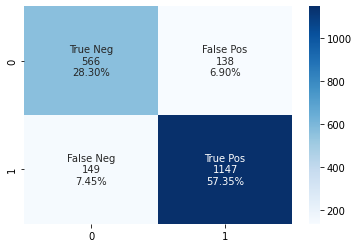

In [236]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion2.flatten()/np.sum(confusion2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion2, annot=labels, fmt='', cmap='Blues')

In [237]:
print(classification_report(y_pred_final.Purchased, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       704
           1       0.89      0.89      0.89      1296

    accuracy                           0.86      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.86      0.86      0.86      2000



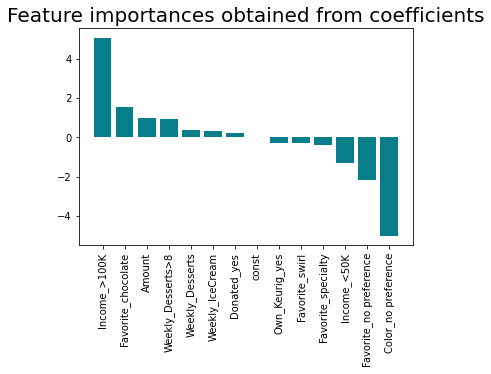

In [238]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()